In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
x = np.linspace(0.1, 100, 200)
y = np.log(x) * x

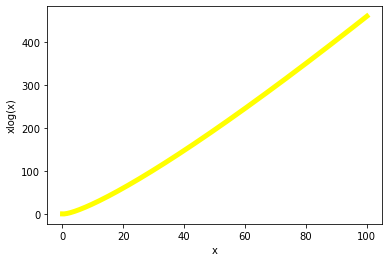

In [13]:
plt.plot(x, y, color = 'yellow', linewidth = 5)
plt.xlabel('x')
plt.ylabel('xlog(x)')
plt.show()

In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split

In [5]:
noise = np.random.random(20) + 1
x_train = np.linspace(.1, 75, 20) + noise
y_train = ((np.log(x_train))*(x_train))

In [6]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

In [7]:
sigma_square = 1
kernel1 = sigma_square * RBF(length_scale= 1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel1, n_restarts_optimizer=9)
gaussian_process.fit(x_train, y_train)
gaussian_process.kernel_

C:\Users\Mayur\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


212**2 * RBF(length_scale=14.2)

In [8]:
test_noise = np.random.random(10) + 1
x_test = pd.DataFrame(np.linspace(0.1, 75, 10) + test_noise)
y_test = pd.DataFrame(np.log(x_test) * x_test)

In [9]:
final_predictions, std_predictions = gaussian_process.predict(x_test, return_std=True)

In [10]:
final_predictions

array([[  1.43241227],
       [ 23.26515937],
       [ 53.94628859],
       [ 85.31561661],
       [124.6253376 ],
       [163.60578489],
       [204.09037256],
       [243.20965099],
       [287.58364081],
       [334.33780664]])

Text(0, 0.5, 'xlog(x)')

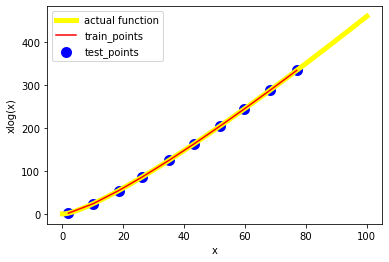

In [14]:
plt.plot(x, y, color = 'yellow', linewidth = 5)

plt.plot(x_test.values, y_test.values, color = 'red')

plt.scatter(x_test.values, final_predictions, color = 'blue', linewidth = 5)

plt.legend(['actual function','train_points', 'test_points'])

plt.xlabel('x')

plt.ylabel('xlog(x)')